In [42]:
import pandas as pd

In [43]:
df_yearly = pd.read_csv("annual_deaths_by_clinic.csv")
df_monthly = pd.read_csv("monthly_deaths.csv")

# **2. Data Exploration:**

**a. Quelle est la forme des DataFrames df_yearly et df_monthly ?**

In [44]:
df_yearly.dtypes

,0
year,int64
births,int64
deaths,int64
clinic,object


In [45]:
df_monthly.dtypes

,0
date,object
births,int64
deaths,int64


**b. Combien y a-t-il de lignes et de colonnes ?**

In [46]:
df_yearly.shape

(12, 4)

In [47]:
df_monthly.shape

(98, 3)

**c. Quels sont les noms des colonnes ?**

In [48]:
df_yearly.columns

Index(['year', 'births', 'deaths', 'clinic'], dtype='object')

In [49]:
df_monthly.columns

Index(['date', 'births', 'deaths'], dtype='object')

**d. Quelles années sont incluses dans le jeu de données ?**

In [50]:
df_yearly.year.unique()

array([1841, 1842, 1843, 1844, 1845, 1846])

In [51]:
df_monthly["date"] = pd.to_datetime(df_monthly["date"])
df_monthly["date"].dt.year.unique()

array([1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849], dtype=int32)

**e. Y a-t-il des valeurs NaN ou des doublons ?**

In [52]:
df_yearly.isna().sum()

,0
year,0
births,0
deaths,0
clinic,0


In [53]:
df_monthly.isna().sum()

,0
date,0
births,0
deaths,0


**f. Quelle était la moyenne du nombre de naissances qui avaient lieu par mois ?**

In [54]:
df_monthly["date"] = pd.to_datetime(df_monthly["date"])
df_monthly['Month'] = df_monthly['date'].dt.to_period('M')
moyenne_naissances_par_mois = df_monthly.groupby('Month')['births'].mean()
moyenne_naissances_par_mois

,births
Month,
1841-01,254.0
1841-02,239.0
1841-03,277.0
1841-04,255.0
1841-05,255.0
...,...
1848-11,310.0
1848-12,373.0
1849-01,403.0


**g. Quelle était la moyenne du nombre de décès qui avaient lieu par mois ?**

In [55]:
df_monthly["date"] = pd.to_datetime(df_monthly["date"])
df_monthly['Month'] = df_monthly['date'].dt.to_period('M')
moyenne_décès_par_mois = df_monthly.groupby('Month')['deaths'].mean()
moyenne_décès_par_mois

,deaths
Month,
1841-01,37.0
1841-02,18.0
1841-03,12.0
1841-04,4.0
1841-05,2.0
...,...
1848-11,9.0
1848-12,5.0
1849-01,9.0


# **3. Visualiser le nombre total de naissances 🤱 et de décès 🤱 au fil du temps:**

**a. Tracer les données mensuelles sur des axes jumeaux:**

In [56]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

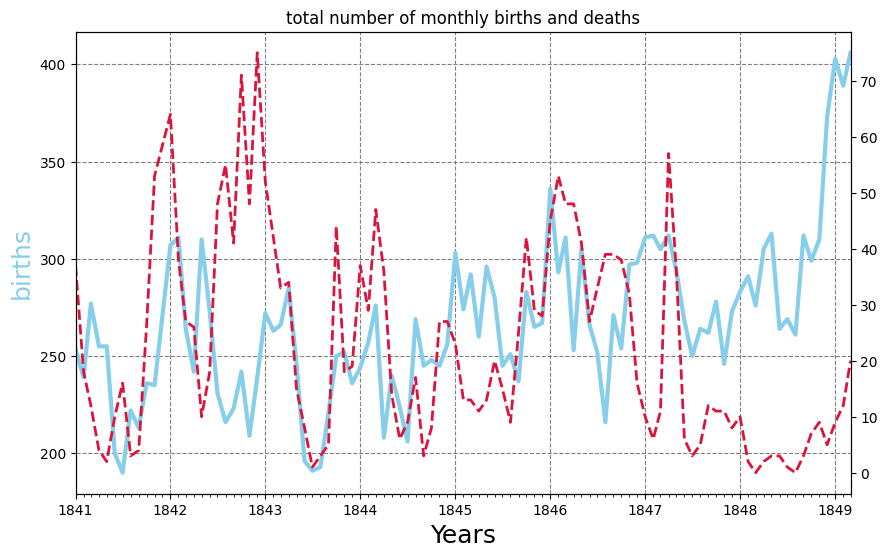

In [57]:
plt.figure(figsize=(10, 6))
plt.title('total number of monthly births and deaths')

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_ylabel("births", color="skyblue", fontsize = 18)
ax1.set_xlabel("Years", fontsize = 18)

ax1.set_xlim([df_monthly.date.min(), df_monthly.date.max()])

ax1.grid(color="grey", linestyle="--")

ax1.plot(df_monthly.date, df_monthly.births, color="skyblue", linewidth=3, label="births")
ax2.plot(df_monthly.date, df_monthly.deaths, color="crimson", linewidth=2, linestyle="--", label="deaths")

ax1.xaxis.set_minor_locator(mdates.MonthLocator())

**vii. Remarquez-vous quelque chose vers la fin des années 1840 ?**

d'après le graph, on remarque qu'avant l'année 1847 il avait une augmentation dans les cas des décès malgre l'augmentation des naissances  ; mais après 1847 on observe q'il y a un grand changement avec une augmentation des cas de naissances et diminution des décès.

# **4. Les données annuelles réparties par clinique:**

**Utilisez Plotly pour créer des graphiques en ligne des naissances et des décès des deux cliniques différentes de l'Hôpital Général de Vienne.**

In [58]:
import plotly.express as px

In [18]:
figure_naissances = px.line(df_yearly, x='year', y='births', color='clinic',title="births by clinic", labels={'births', 'year'})

figure_deces = px.line(df_yearly, x='year', y='deaths', color='clinic',title="deaths by clinic", labels={'death', 'year'})

figure_naissances.show()
figure_deces.show()

i. Quelle clinique est plus grande ou plus occupée en se basant sur le nombre de naissances ? => **clini1**

ii. L'hôpital a-t-il eu plus de patients au fil du temps ? => **Oui**

iii. Quel a été le nombre le plus élevé de décès enregistrés dans la clinique 1 et la clinique 2 ? => clinic1 : **518 deaths et clinic2 : 202 deaths**

**b. Calculer la proportion de décès dans chaque clinique.**

In [19]:
totals = df_yearly.groupby('clinic')[['births', 'deaths']].sum()
totals['proportion_deaths'] = (totals['deaths'] / totals['births'] ) * 100
totals['proportion_deaths']

,proportion_deaths
clinic,
clinic 1,9.924159
clinic 2,3.883986


**c. Tracer la proportion des décès annuels par clinique.**

In [20]:
df_yearly['proportion_deaths'] = df_yearly['deaths'] / df_yearly['births'] * 100

# Tracer les proportions de décès annuels par clinique
fig = px.line(df_yearly, x='year', y='proportion_deaths', color='clinic',
              title="Proportion des Décès Annuels par Clinique",
              labels={'proportion_deaths': 'Proportion de Décès (%)', 'year': 'Année', 'clinic': 'Clinique'},
              markers=True)

# Afficher le graphique
fig.show()

i. Quelle clinique a une proportion de décès plus élevée ? => **clinic 1**

ii. Quel est le taux de décès mensuel le plus élevé dans la clinique 1 par rapport à la clinique 2 ?

In [21]:
df_yearly['monthly_deaths'] = df_yearly['deaths'] / 12
df_yearly

,year,births,deaths,clinic,proportion_deaths,monthly_deaths
0,1841,3036,237,clinic 1,7.806324,19.750000
1,1842,3287,518,clinic 1,15.759051,43.166667
2,1843,3060,274,clinic 1,8.954248,22.833333
3,1844,3157,260,clinic 1,8.235667,21.666667
4,1845,3492,241,clinic 1,6.901489,20.083333
5,1846,4010,459,clinic 1,11.446384,38.250000
6,1841,2442,86,clinic 2,3.521704,7.166667
7,1842,2659,202,clinic 2,7.596841,16.833333
8,1843,2739,164,clinic 2,5.987587,13.666667
9,1844,2956,68,clinic 2,2.300406,5.666667


In [22]:
max_monthly_death_clinic1 = df_yearly[df_yearly['clinic'] == 'clinic 1']['monthly_deaths'].max()
max_monthly_death_clinic1

43.166666666666664

In [23]:
max_monthly_death_clinic2 = df_yearly[df_yearly['clinic'] == 'clinic 2']['monthly_deaths'].max()
max_monthly_death_clinic2

16.833333333333332

# **5. L'effet du lavage des mains (The Effect of Handwashing):**

**a. Ajouter une colonne appelée "pct_deaths" à df_monthly qui contient le pourcentage de décès par rapport aux naissances pour chaque ligne.**

In [24]:
df_monthly["pct_deaths"] = (df_monthly["deaths"] / df_monthly["births"]) * 100
df_monthly

,date,births,deaths,Month,pct_deaths
0,1841-01-01,254,37,1841-01,14.566929
1,1841-02-01,239,18,1841-02,7.531381
2,1841-03-01,277,12,1841-03,4.332130
3,1841-04-01,255,4,1841-04,1.568627
4,1841-05-01,255,2,1841-05,0.784314
...,...,...,...,...,...
93,1848-11-01,310,9,1848-11,2.903226
94,1848-12-01,373,5,1848-12,1.340483
95,1849-01-01,403,9,1849-01,2.233251
96,1849-02-01,389,12,1849-02,3.084833


**b. Créer deux sous-ensembles à partir des données df_monthly : avant et après que le Dr Semmelweis ait ordonné le lavage des mains.**




In [25]:
df_monthly['date'] = pd.to_datetime(df_monthly['date'])

date_reference = pd.Timestamp('1847-06-01')

df_avant_1847 = df_monthly[df_monthly['date'] < date_reference]

df_apres_1847 = df_monthly[df_monthly['date'] >= date_reference]

In [26]:
df_avant_1847


,date,births,deaths,Month,pct_deaths
0,1841-01-01,254,37,1841-01,14.566929
1,1841-02-01,239,18,1841-02,7.531381
2,1841-03-01,277,12,1841-03,4.332130
3,1841-04-01,255,4,1841-04,1.568627
4,1841-05-01,255,2,1841-05,0.784314
...,...,...,...,...,...
71,1847-01-01,311,10,1847-01,3.215434
72,1847-02-01,312,6,1847-02,1.923077
73,1847-03-01,305,11,1847-03,3.606557
74,1847-04-01,312,57,1847-04,18.269231


In [27]:
df_apres_1847

,date,births,deaths,Month,pct_deaths
76,1847-06-01,268,6,1847-06,2.238806
77,1847-07-01,250,3,1847-07,1.200000
78,1847-08-01,264,5,1847-08,1.893939
79,1847-09-01,262,12,1847-09,4.580153
80,1847-10-01,278,11,1847-10,3.956835
81,1847-11-01,246,11,1847-11,4.471545
82,1847-12-01,273,8,1847-12,2.930403
83,1848-01-01,283,10,1848-01,3.533569
84,1848-02-01,291,2,1848-02,0.687285
85,1848-03-01,276,0,1848-03,0.000000


**c. Calculer le taux de mortalité moyen avant juin 1847.**

In [28]:
df_avant_1847['taux_mortalite'] = df_avant_1847['deaths'] / df_avant_1847['births']

# Calculer le taux de mortalité moyen
taux_mortalite_moyen = df_avant_1847['taux_mortalite'].mean()
taux_mortalite_moyen

<ipython-input-28-7bb9381f58fd>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0.10504998260908789

**d. Calculer le taux de mortalité moyen après juin 1847.**

In [29]:
df_apres_1847['taux_mortalite'] = df_apres_1847['deaths'] / df_apres_1847['births']

# Calculer le taux de mortalité moyen
taux_mortalite_moyene = df_apres_1847['taux_mortalite'].mean()
taux_mortalite_moyene

<ipython-input-29-6894d2fd5415>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0.021093375097254535

**e. Créer un DataFrame qui contient le taux de mortalité moyen mobile (rolling average )sur 6 mois avant l'obligation du lavage des mains.**

In [30]:
df_avant_1847['taux_mortalite_moyen_mobile'] = df_avant_1847['taux_mortalite'].rolling(window=6, min_periods=1).mean()
df_avant_1847

<ipython-input-30-2c6219db3e57>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,births,deaths,Month,pct_deaths,taux_mortalite,taux_mortalite_moyen_mobile
0,1841-01-01,254,37,1841-01,14.566929,0.145669,0.145669
1,1841-02-01,239,18,1841-02,7.531381,0.075314,0.110492
2,1841-03-01,277,12,1841-03,4.332130,0.043321,0.088101
3,1841-04-01,255,4,1841-04,1.568627,0.015686,0.069998
4,1841-05-01,255,2,1841-05,0.784314,0.007843,0.057567
...,...,...,...,...,...,...,...
71,1847-01-01,311,10,1847-01,3.215434,0.032154,0.111277
72,1847-02-01,312,6,1847-02,1.923077,0.019231,0.084390
73,1847-03-01,305,11,1847-03,3.606557,0.036066,0.066415
74,1847-04-01,312,57,1847-04,18.269231,0.182692,0.071930


**f. Ajouter 3 lignes distinctes au graphique : le taux de mortalité avant le lavage des mains, après le lavage des mains, et la moyenne mobile sur 6 mois avant le lavage des mains.**

In [31]:
import matplotlib.pyplot as plt

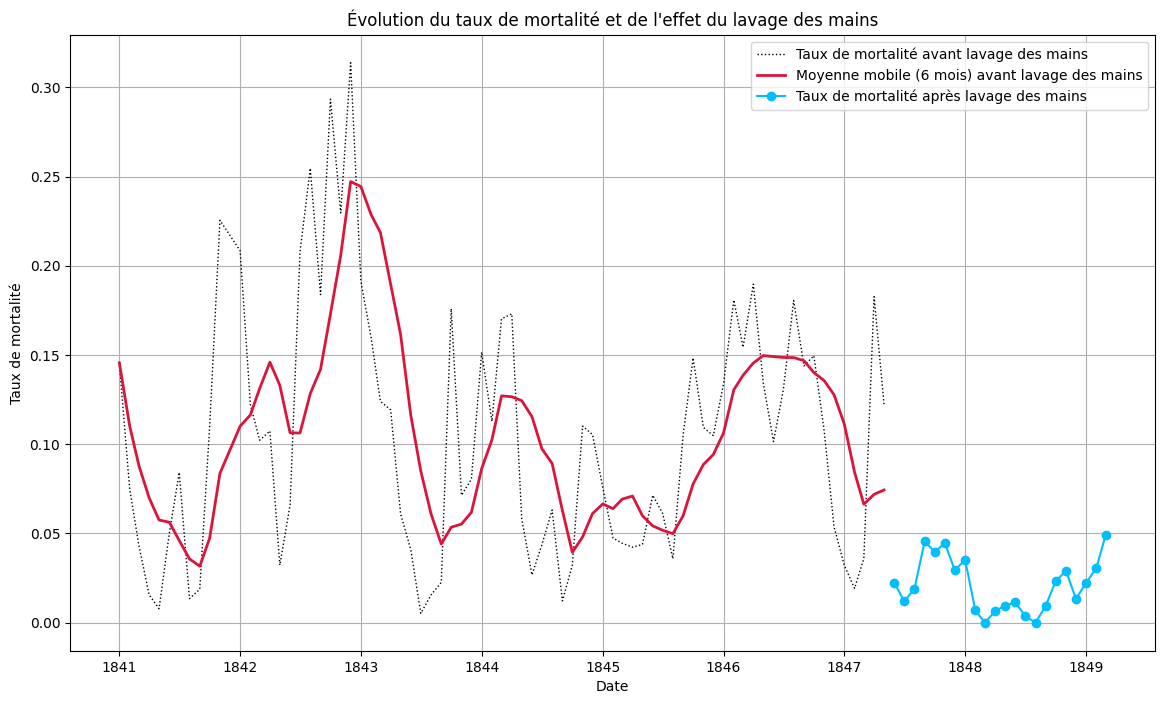

In [32]:
plt.figure(figsize=(14, 8))

# g. Afficher le taux de mortalité mensuel avant le lavage des mains sous forme de ligne noire fine en pointillés.
plt.plot(df_avant_1847['date'], df_avant_1847['taux_mortalite'], linestyle=':', color='black', linewidth=1, label="Taux de mortalité avant lavage des mains")

# h. Afficher la moyenne mobile comme une ligne cramoisie plus épaisse
plt.plot(df_avant_1847['date'], df_avant_1847['taux_mortalite_moyen_mobile'], color='crimson', linewidth=2, label="Moyenne mobile (6 mois) avant lavage des mains")

# i. Afficher le taux après le lavage des mains comme une ligne bleu ciel avec des marqueurs ronds.
plt.plot(df_apres_1847['date'], df_apres_1847['taux_mortalite'], color='deepskyblue', linewidth=1.5, marker='o', label="Taux de mortalité après lavage des mains")

plt.xlabel('Date')
plt.ylabel('Taux de mortalité')
plt.title("Évolution du taux de mortalité et de l'effet du lavage des mains")
plt.legend()
plt.grid(True)
plt.show()

**j. Quelle était la moyenne du pourcentage de décès mensuels avant le lavage des mains ?**



In [33]:
df_avant_1847['pourcentage_mortalite'] = df_avant_1847['taux_mortalite'] * 100

moyenne_pourcentage_mortalite = df_avant_1847['pourcentage_mortalite'].mean()
moyenne_pourcentage_mortalite

<ipython-input-33-fa097e94534b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



10.504998260908787

**k. Quel était le pourcentage moyen de décès mensuels après que le lavage des mains ait été rendu obligatoire ?**

In [34]:
df_apres_1847["pourcentage_mortalite"] = df_apres_1847["taux_mortalite"] * 100

pourcentage_moyen_mortalite = df_apres_1847["pourcentage_mortalite"].mean()
pourcentage_moyen_mortalite

<ipython-input-34-6a2be611bba6>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2.1093375097254534

**l. De combien le lavage des mains a-t-il réduit la chance moyenne de mourir lors de l'accouchement en termes de pourcentage ?**

reduction = ((Moyenne avant lavage − Moyenne apres lavage) / Moyenne avant lavage ) *100

In [35]:
reduction_pourcentage = ((moyenne_pourcentage_mortalite - pourcentage_moyen_mortalite) / moyenne_pourcentage_mortalite) * 100
reduction_pourcentage

79.92062961519258

**m. Comment ces chiffres se comparent-ils à la moyenne pour toute la décennie des années 1840 que nous avons calculée plus tôt ?**

In [36]:
df_1840s = df_monthly[(df_monthly['date'] >= '1840-01-01') & (df_monthly['date'] <= '1849-12-31')]      # pour filtrer uniquement les annees de 1840
df_1840s['taux_mortalite'] = df_1840s['deaths'] / df_1840s['births']                                    # le taux de mortalite de chaque mois
df_1840s['pourcentage_mortalite'] = df_1840s['taux_mortalite'] * 100                                    # le pourcentage
moyenne_pourcentage_mortalite_1840s = df_1840s['pourcentage_mortalite'].mean()
moyenne_pourcentage_mortalite_1840s
# ce chifre est tres faible par rapport a la moyenne des deces apres le lavage des mains

8.620258092275797

**n. Combien de fois les chances de mourir après le lavage des mains sont-elles plus faibles qu'avant ?**

facteur de reduction = moyenne avant lavage / moyenne apres lavage

In [37]:
nbr_chance = moyenne_pourcentage_mortalite /pourcentage_moyen_mortalite
nbr_chance

4.980235838254303

**o. Utiliser des diagrammes en boîte (box plots) pour montrer comment le taux de mortalité a changé avant et après le lavage des mains:**

i. Utiliser la fonction .where() de NumPy pour ajouter une colonne à df_monthly qui indique si une date particulière est avant ou après le début du lavage des mains.

In [38]:
import numpy as np

In [39]:
df_monthly['date'] = pd.to_datetime(df_monthly['date'])
df_monthly['periode'] = np.where(df_monthly['date'] < '1847-06-01', 'Avant lavage des mains', 'Après lavage des mains')
df_monthly

,date,births,deaths,Month,pct_deaths,periode
0,1841-01-01,254,37,1841-01,14.566929,Avant lavage des mains
1,1841-02-01,239,18,1841-02,7.531381,Avant lavage des mains
2,1841-03-01,277,12,1841-03,4.332130,Avant lavage des mains
3,1841-04-01,255,4,1841-04,1.568627,Avant lavage des mains
4,1841-05-01,255,2,1841-05,0.784314,Avant lavage des mains
...,...,...,...,...,...,...
93,1848-11-01,310,9,1848-11,2.903226,Après lavage des mains
94,1848-12-01,373,5,1848-12,1.340483,Après lavage des mains
95,1849-01-01,403,9,1849-01,2.233251,Après lavage des mains
96,1849-02-01,389,12,1849-02,3.084833,Après lavage des mains


ii. Ensuite, utiliser Plotly pour créer un diagramme en boîte (box plot) des données avant et après le lavage des mains.


In [40]:
df_monthly['taux_mortalite'] = df_monthly['deaths'] / df_monthly['births']
df_monthly

,date,births,deaths,Month,pct_deaths,periode,taux_mortalite
0,1841-01-01,254,37,1841-01,14.566929,Avant lavage des mains,0.145669
1,1841-02-01,239,18,1841-02,7.531381,Avant lavage des mains,0.075314
2,1841-03-01,277,12,1841-03,4.332130,Avant lavage des mains,0.043321
3,1841-04-01,255,4,1841-04,1.568627,Avant lavage des mains,0.015686
4,1841-05-01,255,2,1841-05,0.784314,Avant lavage des mains,0.007843
...,...,...,...,...,...,...,...
93,1848-11-01,310,9,1848-11,2.903226,Après lavage des mains,0.029032
94,1848-12-01,373,5,1848-12,1.340483,Après lavage des mains,0.013405
95,1849-01-01,403,9,1849-01,2.233251,Après lavage des mains,0.022333
96,1849-02-01,389,12,1849-02,3.084833,Après lavage des mains,0.030848


In [41]:
fig = px.box(df_monthly, x='periode', y='taux_mortalite',
             title="Taux de mortalité avant et après le lavage des mains",
             labels={'taux_mortalite': 'Taux de mortalité', 'periode': 'Période'},
             points="all")  # Affiche tous les points pour une meilleure visualisation

fig.show()

iii. Comment les statistiques clés telles que la moyenne, le maximum, le minimum, le 1er et le 3e quartile ont-elles changé à la suite de la nouvelle politique ?

In [59]:
'''En comparant les diagrammes avant et après le lavage des mains, on observe :
Changements dans la médiane :  la médiane est plus basse après le lavage des mains, cela signifie que le taux de mortalité moyen a diminué.
Changements dans l’étendue : Une diminution du maximum ou de l’intervalle interquartile (entre le premier et le troisième quartile) indique une réduction de la variabilité du taux de mortalité.
Cela te donnera une vue claire de l'impact du lavage des mains sur la réduction des décès pendant l'accouchement.'''

"En comparant les diagrammes avant et après le lavage des mains, on observe :\nChangements dans la médiane :  la médiane est plus basse après le lavage des mains, cela signifie que le taux de mortalité moyen a diminué.\nChangements dans l’étendue : Une diminution du maximum ou de l’intervalle interquartile (entre le premier et le troisième quartile) indique une réduction de la variabilité du taux de mortalité.\nCela te donnera une vue claire de l'impact du lavage des mains sur la réduction des décès pendant l'accouchement."

**p. Utiliser une estimation de densité par noyau (KDE) pour visualiser une distribution lissée :**

i. Utiliser la fonction .kdeplot() de Seaborn pour créer deux estimations de densité par noyau (KDE) du pct_deaths, une pour avant le lavage des mains et une pour après.

ii. Utiliser le paramètre shade pour donner à vos deux distributions des couleurs différentes.(dans les nouveaux versions de seaborn "fill' remplace "shade")

In [60]:
import seaborn as sns

<ipython-input-70-f533323a2b11>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-70-f533323a2b11>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




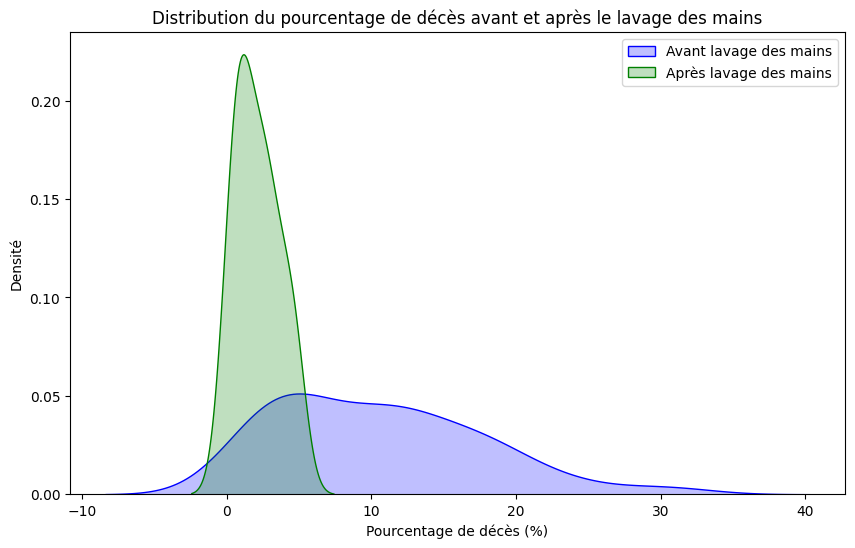

In [70]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_avant_1847['pct_deaths'], shade=True, color="blue", label="Avant lavage des mains")
sns.kdeplot(df_apres_1847['pct_deaths'], shade=True, color="green", label="Après lavage des mains")

plt.title("Distribution du pourcentage de décès avant et après le lavage des mains")
plt.xlabel("Pourcentage de décès (%)")
plt.ylabel("Densité")
plt.legend()

plt.show()

iii. Quelle faiblesse remarquez-vous dans le graphique lorsque vous utilisez simplement les paramètres par défaut ?

Manque de détails numériques ,Aucun repère de la moyenne et de la médiane,** "les valeurs extremes"**

iv. Utiliser le paramètre clip pour résoudre le problème.

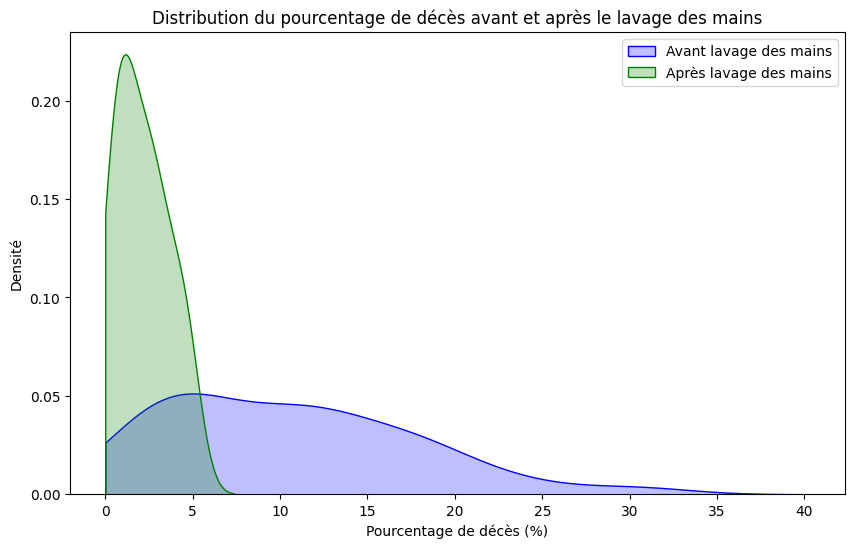

In [65]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_avant_1847['pct_deaths'], fill=True, color="blue", label="Avant lavage des mains", clip=(0, 50))
sns.kdeplot(df_apres_1847['pct_deaths'], fill=True, color="green", label="Après lavage des mains", clip=(0, 50))

# Ajouter des titres et légendes
plt.title("Distribution du pourcentage de décès avant et après le lavage des mains")
plt.xlabel("Pourcentage de décès (%)")
plt.ylabel("Densité")
plt.legend()

plt.show()

**q. Utiliser un T-test pour montrer la signification statistique :**

iii. Importer stats de scipy.

In [63]:
from scipy import stats
from scipy.stats import ttest_ind

i. Utiliser un t-test pour déterminer si les différences dans les moyennes sont statistiquement significatives ou simplement dues au hasard.

iv. Utiliser la fonction .ttest_ind() pour calculer la statistique t et la valeur p.

In [67]:
date_reference = '1847-06-01'
df_monthly['pct_deaths'] = (df_monthly['deaths'] / df_monthly['births']) * 100
pct_deaths_avant = df_monthly[df_monthly['date'] < date_reference]['pct_deaths']
pct_deaths_apres = df_monthly[df_monthly['date'] >= date_reference]['pct_deaths']
# le test t
t_stat, p_value = ttest_ind(pct_deaths_avant, pct_deaths_apres, equal_var=False)
# ttest_ind : Effectue un test t pour deux échantillons indépendants
# equal_var=False si variances inégales, indique que les variances des deux groupes peuvent être différentes.
print(f"T-statistique : {t_stat}")
print(f"P-value : {p_value}")

T-statistique : 9.610070667995194
P-value : 1.4452771414077584e-15


*T-statistique et p-value : La T-statistique mesure la taille de la différence par rapport à la variation de l'échantillon, tandis que la p-value indique la probabilité que cette différence soit due au hasard.*

ii. Si la valeur p est inférieure à 1 %, alors nous pouvons être sûrs à 99 % que le lavage des mains a eu un impact sur le taux de mortalité mensuel moyen.

In [71]:
if p_value < 0.01:
    print("La différence est statistiquement significative(99 % le lavage des mains a eu un impact sur le taux de mortalité mensuel moyen.) (p < 0.01).")
else:
    print("La différence n'est pas statistiquement significative (p >0.01).")

La différence est statistiquement significative(99 % le lavage des mains a eu un impact sur le taux de mortalité mensuel moyen.) (p < 0.01).


v. La différence dans la proportion moyenne de décès mensuels est-elle statistiquement significative au niveau de 99 % ? => **oui le lavage des mains eu un impact sur le taux de mortalité**